<a href="https://colab.research.google.com/github/01ponyo/ML-Playground/blob/main/dls/Feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кредитный скоринг

В этом ноутбуке мы разберем некоторые темы feature engineering на примере датасета для задачи кредитного скоринга.

Для этой задачи есть [учебное соревнование на Kaggle](https://www.kaggle.com/competitions/bank-issues-042022/leaderboard). Вы можете отправлять в него свои решения.

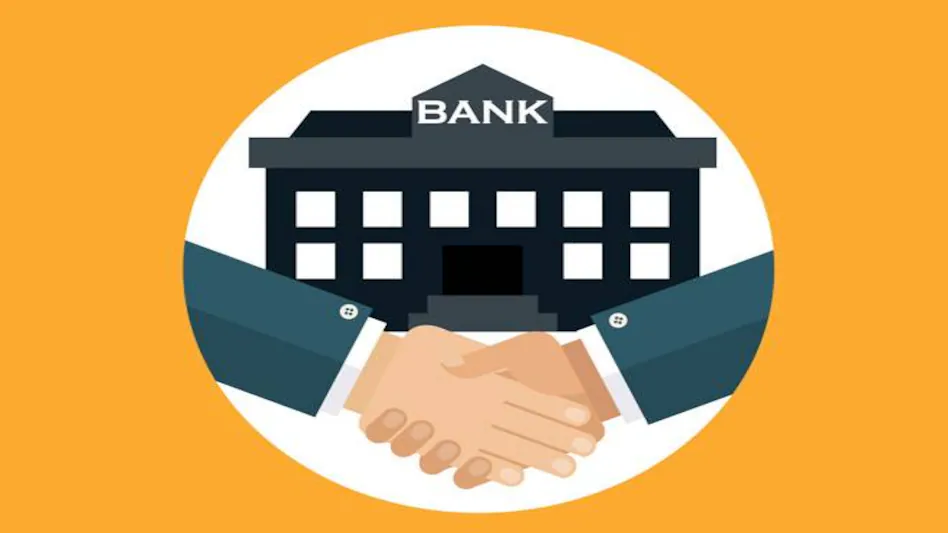

## Скачивание данных

Скачаем данные и импортируем нужные библиотеки

In [1]:
! pip install wldhx.yadisk-direct
! curl -L $(yadisk-direct https://disk.yandex.com/d/sknuSa3xoNBsDw) -o bank-issues-data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 3473k  100 3473k    0     0  1187k      0  0:00:02  0:00:02 --:--:-- 1761k


In [2]:
! unzip -qq bank-issues-data.zip

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Обработка тренировочных данных

In [4]:
train_data = pd.read_csv('./bank-issues-data/train.csv')
test_data = pd.read_csv('./bank-issues-data/test.csv')

In [5]:
train_data.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,25,UNM,SPC,26389.0,10,1.32,0.584105,SCH,ОБЛ КУРСКАЯ,35000.0,2.0,0.0,1
1,2,F,37,MAR,SPC,19588.0,12,1.43,0.718935,SCH,РЕСПУБЛИКА ТАТАРСТАН,15000.0,0.0,0.0,1
2,3,F,28,UNM,SPC,53669.0,18,1.10,0.586015,GRD,МОСКВА Г,70000.0,4.0,0.0,1
3,4,M,34,MAR,SPC,26349.0,10,1.43,0.655703,SCH,СВЕРДЛОВСКАЯ ОБЛАСТЬ,42500.0,4.0,0.0,0
4,5,F,43,MAR,UMN,11589.0,10,1.10,0.271893,GRD,РЯЗАНСКАЯ ОБЛАСТЬ,20000.0,3.0,0.0,0


Поля данных:
- **client_id** — Уникальный идентификатор клиента
- **gender** — Пол
- **age** — Возраст (в годах)
- **marital_status** — Семейное положение.
    Возможные значения:
    - UNM : Холост/не замужем
    - DIV : Резведен (а)
    - MAR : Женат/замужем
    - WID : Вдовец, вдова
    - CIV : Гражданский брак
- **job_position** — Работа.
    Возможные значения:
    - SPC : Неруководящий сотрудник - специалист
    - DIR : Руководитель организации
    - HSK : Домохозяйка
    - WOI : Работает на ИП
    - WRK : Неруководящий сотрудник - рабочий
    - ATP : Неруководящий сотрудник - обслуживающий персонал
    - WRP : Работающий пенсионер
    - UMN : Руководитель подразделения
    - NOR : Не работает
    - NS : Пенсионер
    - BIS : Собственный бизнес
    - INP : Индивидуальный предприниматель
- **credit_sum** — Сумма кредита
- **credit_month** — Срок кредитования в месяцах
- **tariff_id** — Номер предлагаемого тарифа
- **education** — Тип образования.
    Возможные знаяения:
    - SCH : Начальное, среднее
    - PGR : Второе высшее
    - GRD : Высшее
    - UGR : Неполное высшее
    - ACD : Ученая степень
- **living_region** — Регион проживания
- **monthly_income** — Зарплата в месяц
- **credit_count** — Количество кредитов у клиента
- **overdue_credit_count** — Количество просроченных кредитов клиента
- **open_account_flag** — Целевая переменная -- выберет клиент наш банк или нет

Отделим целевую переменную от признаков:

In [6]:
y_train = train_data['open_account_flg']
train_data = train_data.drop(columns=['open_account_flg'])

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119518 entries, 0 to 119517
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             119518 non-null  int64  
 1   gender                119518 non-null  object 
 2   age                   119518 non-null  int64  
 3   marital_status        119518 non-null  object 
 4   job_position          119518 non-null  object 
 5   credit_sum            119518 non-null  float64
 6   credit_month          119518 non-null  int64  
 7   tariff_id             119518 non-null  float64
 8   score_shk             119518 non-null  float64
 9   education             119518 non-null  object 
 10  living_region         119385 non-null  object 
 11  monthly_income        119518 non-null  float64
 12  credit_count          113032 non-null  float64
 13  overdue_credit_count  113032 non-null  float64
dtypes: float64(6), int64(3), object(5)
memory usage: 12.

In [8]:
train_data.describe()

,client_id,age,credit_sum,credit_month,tariff_id,score_shk,monthly_income,credit_count,overdue_credit_count
count,119518.000000,119518.000000,119518.000000,119518.000000,119518.000000,119518.000000,119518.000000,113032.000000,113032.000000
mean,59759.500000,36.508451,26095.265071,10.979702,1.324531,0.470053,40101.980664,2.102210,0.046571
std,34502.019074,10.550192,16266.110505,3.537339,0.236189,0.124181,25099.432178,1.777117,0.212725
min,1.000000,18.000000,2736.000000,3.000000,1.000000,0.000000,5600.000000,0.000000,0.000000
25%,29880.250000,28.000000,14898.917500,10.000000,1.100000,0.380353,25000.000000,1.000000,0.000000
50%,59759.500000,34.000000,21244.665000,10.000000,1.320000,0.462000,35000.000000,2.000000,0.000000
75%,89638.750000,43.000000,32068.000000,12.000000,1.600000,0.552855,50000.000000,3.000000,0.000000
max,119518.000000,71.000000,200000.000000,36.000000,1.960000,1.128291,800000.000000,19.000000,3.000000


### Заполнение пропусков

Еще раз выведем то, как выглядят тренировочные данные для удобства

In [9]:
train_data.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count
0,1,M,25,UNM,SPC,26389.0,10,1.32,0.584105,SCH,ОБЛ КУРСКАЯ,35000.0,2.0,0.0
1,2,F,37,MAR,SPC,19588.0,12,1.43,0.718935,SCH,РЕСПУБЛИКА ТАТАРСТАН,15000.0,0.0,0.0
2,3,F,28,UNM,SPC,53669.0,18,1.10,0.586015,GRD,МОСКВА Г,70000.0,4.0,0.0
3,4,M,34,MAR,SPC,26349.0,10,1.43,0.655703,SCH,СВЕРДЛОВСКАЯ ОБЛАСТЬ,42500.0,4.0,0.0
4,5,F,43,MAR,UMN,11589.0,10,1.10,0.271893,GRD,РЯЗАНСКАЯ ОБЛАСТЬ,20000.0,3.0,0.0


Посмотрим, в каких колонках есть пропуски в тренировочных данных

In [10]:
train_data.isna().any()

,0
client_id,False
gender,False
age,False
marital_status,False
job_position,False
credit_sum,False
credit_month,False
tariff_id,False
score_shk,False
education,False


Посмотрим также, какие пропуски есть в тестовых данных:

In [11]:
test_data.isna().any()

,0
client_id,False
gender,False
age,False
marital_status,False
job_position,False
credit_sum,False
credit_month,False
tariff_id,False
score_shk,False
education,False


Видим, что в тестовой части есть пропуски в колонке monthly_income, а в тренировочной части в ней пропусков нет. Нам нужно будет понять, как мы будем заполнять пропуски в этой колонке.

**Внимание**: важно помнить, что иногда в данных бывают пропуски, которые pandas не ловит. Например, когда пропуск в категориальной колонке "job_position", и выражается он тем, что вместо значения стоит пустая строка '' или пробел ' '. Такое pandas не отловит.

**Как можно заполнять пропуски в колонках?**



#### Варианты заполнения пропусков

- Заполнить пропуски некоторой статистикой по данным (среднее/медиана/0/...). Поможет [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) из Sklearn;

    **Вопрос**: почему медиана предпочтительнее среднего?

    **Ответ**: Случайные выбросы могут очень сильно повлиять на среднее значеие по выборке.

- Использовать более сложные стратегии. Например, [IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer) или  [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html);

- Добавить значение "пропуск" на место пропусков. Поможет [MissingIndicator](https://scikit-learn.org/stable/modules/generated/sklearn.impute.MissingIndicator.html#sklearn.impute.MissingIndicator) из Sklearn;
- А иногда вообще бывает так, что из тренировочных данных лучше удалить строки, где много пропусков. Логика такая: если об объекте известно мало, то полезной информации для модели этот объект не несет. Обратите внимание, что из тестовых данных никакие строки удалять нельзя!
- Вообще удалить признак с пропусками. Может быть логично, если пропусков слишком много;

#### Заполнение пропусков в наших данных

Посмотрим, сколько пропущенных значений в колонках credit_count и overdue_credit_count:

In [12]:
train_data['credit_count'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 119518 entries, 0 to 119517
Series name: credit_count
Non-Null Count   Dtype  
--------------   -----  
113032 non-null  float64
dtypes: float64(1)
memory usage: 933.9 KB


In [13]:
np.unique(train_data['credit_count'], return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., nan]),
 array([18219, 31714, 25799, 16707,  9826,  5285,  2760,  1345,   707,
          326,   141,    90,    56,    25,    12,    10,     2,     4,
            1,     3,  6486]))

Заполним пропуск в credit_count медианой:

In [ ]:
# заполнение пропусков статистикой вручную

# median_value_credit_count = np.median(train_data['credit_count'].dropna())
# train_data['credit_count'].fillna(median_value_credit_count)

In [14]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
simple_imputer.fit(train_data[['credit_count']])
train_data['credit_count'] = simple_imputer.transform(train_data[['credit_count']])

In [15]:
train_data['credit_count'].isna().any()

np.False_

Заполним пропуск в overdue_credit_count с помощью KNNImputer:

In [16]:
train_data['job_position'].dtype

dtype('O')

In [17]:
numeric_columns = [column for column in train_data.columns if train_data[column].dtype != 'O']
numeric_columns

['client_id',
 'age',
 'credit_sum',
 'credit_month',
 'tariff_id',
 'score_shk',
 'monthly_income',
 'credit_count',
 'overdue_credit_count']

In [18]:
len(numeric_columns)

9

In [19]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2)
knn_imputer.fit(train_data[numeric_columns])
transformed_overdue_credit_count = knn_imputer.transform(train_data[numeric_columns])[:, 8]
train_data['overdue_credit_count'] = transformed_overdue_credit_count

In [20]:
train_data['overdue_credit_count'].isna().any()

np.False_

### Обработка категориальных признаков

In [21]:
train_data.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count
0,1,M,25,UNM,SPC,26389.0,10,1.32,0.584105,SCH,ОБЛ КУРСКАЯ,35000.0,2.0,0.0
1,2,F,37,MAR,SPC,19588.0,12,1.43,0.718935,SCH,РЕСПУБЛИКА ТАТАРСТАН,15000.0,0.0,0.0
2,3,F,28,UNM,SPC,53669.0,18,1.10,0.586015,GRD,МОСКВА Г,70000.0,4.0,0.0
3,4,M,34,MAR,SPC,26349.0,10,1.43,0.655703,SCH,СВЕРДЛОВСКАЯ ОБЛАСТЬ,42500.0,4.0,0.0
4,5,F,43,MAR,UMN,11589.0,10,1.10,0.271893,GRD,РЯЗАНСКАЯ ОБЛАСТЬ,20000.0,3.0,0.0


In [22]:
categorical_columns = [column for column in train_data.columns if train_data[column].dtype == 'O']
categorical_columns

['gender', 'marital_status', 'job_position', 'education', 'living_region']

In [23]:
categorical_columns = categorical_columns + ['tariff_id']

In [24]:
categorical_columns = [x for x in categorical_columns if x != 'living_region']

In [25]:
np.unique(train_data['marital_status'])

array(['CIV', 'DIV', 'MAR', 'UNM', 'WID'], dtype=object)

#### One-hot кодирование

In [ ]:
# dummy_features = pd.get_dummies(train_data['marital_status'])
# dummy_features.head()

,CIV,DIV,MAR,UNM,WID
0,False,False,False,True,False
1,False,False,True,False,False
2,False,False,False,True,False
3,False,False,True,False,False
4,False,False,True,False,False


One-hot кодирование с помощью OneHotEncoder из Sklearn

In [26]:
categorical_columns

['gender', 'marital_status', 'job_position', 'education', 'tariff_id']

In [27]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='if_binary', sparse_output=False)
ohe.fit(train_data[categorical_columns])
new_category_columns = ohe.transform(train_data[categorical_columns])

In [28]:
new_category_columns

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [29]:
ohe.get_feature_names_out()

array(['gender_M', 'marital_status_CIV', 'marital_status_DIV',
       'marital_status_MAR', 'marital_status_UNM', 'marital_status_WID',
       'job_position_ATP', 'job_position_BIS', 'job_position_BIU',
       'job_position_DIR', 'job_position_HSK', 'job_position_INP',
       'job_position_NOR', 'job_position_PNA', 'job_position_PNI',
       'job_position_PNS', 'job_position_PNV', 'job_position_SPC',
       'job_position_UMN', 'job_position_WOI', 'job_position_WRK',
       'job_position_WRP', 'education_ACD', 'education_GRD',
       'education_PGR', 'education_SCH', 'education_UGR', 'tariff_id_1.0',
       'tariff_id_1.1', 'tariff_id_1.16', 'tariff_id_1.17',
       'tariff_id_1.18', 'tariff_id_1.19', 'tariff_id_1.2',
       'tariff_id_1.21', 'tariff_id_1.22', 'tariff_id_1.23',
       'tariff_id_1.24', 'tariff_id_1.25', 'tariff_id_1.26',
       'tariff_id_1.27', 'tariff_id_1.28', 'tariff_id_1.29',
       'tariff_id_1.3', 'tariff_id_1.32', 'tariff_id_1.4',
       'tariff_id_1.41', 'tarif

In [30]:
new_train_columns = pd.DataFrame(new_category_columns, columns=ohe.get_feature_names_out())
train_data = train_data.drop(columns=categorical_columns)
train_data = pd.concat([train_data, new_train_columns], axis=1)
train_data.head()

,client_id,age,credit_sum,credit_month,score_shk,living_region,monthly_income,credit_count,overdue_credit_count,gender_M,...,tariff_id_1.48,tariff_id_1.5,tariff_id_1.52,tariff_id_1.56,tariff_id_1.6,tariff_id_1.7,tariff_id_1.9,tariff_id_1.91,tariff_id_1.94,tariff_id_1.96
0,1,25,26389.0,10,0.584105,ОБЛ КУРСКАЯ,35000.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,37,19588.0,12,0.718935,РЕСПУБЛИКА ТАТАРСТАН,15000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,28,53669.0,18,0.586015,МОСКВА Г,70000.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,34,26349.0,10,0.655703,СВЕРДЛОВСКАЯ ОБЛАСТЬ,42500.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,43,11589.0,10,0.271893,РЯЗАНСКАЯ ОБЛАСТЬ,20000.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Обработка living_region

In [31]:
np.unique(train_data['living_region'].dropna(), return_counts=True)

(array(['74', '98', 'АДЫГЕЯ РЕСП', 'АЛТАЙСКИЙ', 'АЛТАЙСКИЙ КРАЙ',
        'АМУРСКАЯ ОБЛ', 'АМУРСКАЯ ОБЛАСТЬ', 'АО НЕНЕЦКИЙ',
        'АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - Ю', 'АО ЯМАЛО-НЕНЕЦКИЙ',
        'АОБЛ ЕВРЕЙСКАЯ', 'АРХАНГЕЛЬСКАЯ', 'АРХАНГЕЛЬСКАЯ ОБЛ',
        'АРХАНГЕЛЬСКАЯ ОБЛАСТЬ', 'АСТРАХАНСКАЯ', 'АСТРАХАНСКАЯ ОБЛ',
        'АСТРАХАНСКАЯ ОБЛАСТЬ', 'БАШКОРТОСТАН', 'БАШКОРТОСТАН РЕСП',
        'БЕЛГОРОДСКАЯ ОБЛ', 'БЕЛГОРОДСКАЯ ОБЛАСТЬ', 'БРЯНСКАЯ ОБЛ',
        'БРЯНСКАЯ ОБЛАСТЬ', 'БРЯНСКИЙ', 'БУРЯТИЯ', 'БУРЯТИЯ РЕСП',
        'ВЛАДИМИРСКАЯ ОБЛ', 'ВЛАДИМИРСКАЯ ОБЛАСТЬ', 'ВОЛГОГРАДСКАЯ ОБЛ',
        'ВОЛГОГРАДСКАЯ ОБЛАСТЬ', 'ВОЛОГОДСКАЯ', 'ВОЛОГОДСКАЯ ОБЛ',
        'ВОЛОГОДСКАЯ ОБЛ.', 'ВОЛОГОДСКАЯ ОБЛАСТЬ', 'ВОРОНЕЖСКАЯ ОБЛ',
        'ВОРОНЕЖСКАЯ ОБЛАСТЬ', 'Г МОСКВА', 'Г. МОСКВА',
        'Г. САНКТ-ПЕТЕРБУРГ', 'Г.МОСКВА', 'ГОРЬКОВСКАЯ ОБЛ',
        'ГУСЬ-ХРУСТАЛЬНЫЙ Р-Н', 'ДАГЕСТАН РЕСП', 'ЕВРЕЙСКАЯ АВТОНОМНАЯ',
        'ЕВРЕЙСКАЯ АОБЛ', 'ЗАБАЙКАЛЬСКИЙ КРАЙ', 'ИВАНОВСКАЯ ОБЛ',

Какие проблемы тут есть или могут возникнуть:

- Один и тот же регион написан по-разному;
- Есть регионы, которые встречаются очень редко;
- Возможны два типа ситуаций:
    - Какой-то регион есть в тренировочных данных, но его нет в тестовых;
    - Какой-то регион есть в тестовых данных, но его нет в тренировочных.

Также из этого признака можно создать новые признаки:
- какие?


**Задание**: обработайте признак living_region. Не забудьте, что в тестовых данных вам нужно будет обработать этот признак в той же манере, что и в тренировочных данных.

In [37]:
import re
import unicodedata

In [38]:
DASHES = r"[\u2010\u2011\u2012\u2013\u2014\u2212-]"

In [39]:

def _u(s):
    if pd.isna(s): return np.nan
    s = str(s)
    # normalize unicode, upper, strip
    s = unicodedata.normalize("NFKC", s).upper().strip()
    # unify slashes and dashes
    s = re.sub(r"[\\/]", "/", s)               # slashes to "/"
    s = re.sub(DASHES, "-", s)                 # any dash to "-"
    # collapse whitespace
    s = re.sub(r"\s+", " ", s)
    return s

# tokens we want to strip out entirely (order matters: longer first)
REMOVE_TOKENS = [
    r"\bФЕДЕРАЛЬНЫЙ ОКРУГ\b",
    r"\bАВТОНОМНЫЙ ОКРУГ\b",
    r"\bАВТОНОМНЫЙ\b",
    r"\bАВТ\.?\b",
    r"\bОКРУГ\b",
    r"\bОБЛАСТЬ\b",
    r"\bОБЛ\.?\b",
    r"\bРЕСПУБЛИКА\b",
    r"\bРЕСП\.?\b",
    r"\bГ\.\b", r"\bГ\b",
    r"\bАОБЛ\b", r"\bАО\b",
    r"\bКРАЙ\b",
    r"\bР-Н\b", r"\bРАЙОН\b",
    r"\bГОРЬКОВСКАЯ\b",
    r"\bРОССИЯ\b",
]

REPLACE_BEFORE = {
    "Г.МОСКВА": "МОСКВА",
    "Г МОСКВА": "МОСКВА",
    "Г. МОСКВА": "МОСКВА",
    "САНКТ ПЕТЕРБУРГ": "САНКТ-ПЕТЕРБУРГ",
    "Г. САНКТ-ПЕТЕРБУРГ": "САНКТ-ПЕТЕРБУРГ",
    "СЕВ. ОСЕТИЯ - АЛАНИЯ": "СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ",
    "САХА /ЯКУТИЯ/": "САХА (ЯКУТИЯ)",
    "РЕСП САХА /ЯКУТИЯ/": "САХА (ЯКУТИЯ)",
    "РЕСП. САХА (ЯКУТИЯ)": "САХА (ЯКУТИЯ)",
    "РЕСП САХА (ЯКУТИЯ)": "САХА (ЯКУТИЯ)",
    "ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - Ю": "ХАНТЫ-МАНСИЙСКИЙ - ЮГРА",
    "ХАНТЫ-МАНСИЙСКИЙ АО": "ХАНТЫ-МАНСИЙСКИЙ - ЮГРА",
    "НЕНЕЦКИЙ АО": "НЕНЕЦКИЙ",
    "ЯМАЛО-НЕНЕЦКИЙ АО": "ЯМАЛО-НЕНЕЦКИЙ",
    "ЕВРЕЙСКАЯ АОБЛ": "ЕВРЕЙСКАЯ",
    "ЕВРЕЙСКАЯ АВТОНОМНАЯ": "ЕВРЕЙСКАЯ",
    "КАЛИНИНГРАДСКАЯ ОБЛ.": "КАЛИНИНГРАДСКАЯ",
    "ВОЛОГОДСКАЯ ОБЛ.": "ВОЛОГОДСКАЯ",
    "КРАЙ. КРАСНОЯРСКИЙ": "КРАСНОЯРСКИЙ",
    "КРАЙ. ПЕРМСКИЙ": "ПЕРМСКИЙ",
    "КРАЙ. СТАВРОПОЛЬСКИЙ": "СТАВРОПОЛЬСКИЙ",
    "ПЕРМСКАЯ ОБЛ": "ПЕРМСКИЙ",
    "ПЕРМСКИЙ": "ПЕРМСКИЙ",  # (kept to show intentional mapping)
    "ГОРЬКОВСКАЯ ОБЛ": "НИЖЕГОРОДСКАЯ",
}

CANON_MAP = {
    "МОСКВА": "МОСКВА",
    "САНКТ-ПЕТЕРБУРГ": "САНКТ-ПЕТЕРБУРГ",
    "СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ": "СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ",
    "САХА (ЯКУТИЯ)": "САХА (ЯКУТИЯ)",
    "ХАНТЫ-МАНСИЙСКИЙ - ЮГРА": "ХАНТЫ-МАНСИЙСКИЙ - ЮГРА",
    "ЯМАЛО-НЕНЕЦКИЙ": "ЯМАЛО-НЕНЕЦКИЙ",
    "ЕВРЕЙСКАЯ": "ЕВРЕЙСКАЯ",
    "АДЫГЕЯ": "АДЫГЕЯ",
    "АЛТАЙ": "АЛТАЙ",
    "АЛТАЙСКИЙ": "АЛТАЙСКИЙ",
    "АМУРСКАЯ": "АМУРСКАЯ",
    "АРХАНГЕЛЬСКАЯ": "АРХАНГЕЛЬСКАЯ",
    "АСТРАХАНСКАЯ": "АСТРАХАНСКАЯ",
    "БАШКОРТОСТАН": "БАШКОРТОСТАН",
    "БЕЛГОРОДСКАЯ": "БЕЛГОРОДСКАЯ",
    "БРЯНСКАЯ": "БРЯНСКАЯ",
    "БУРЯТИЯ": "БУРЯТИЯ",
    "ВЛАДИМИРСКАЯ": "ВЛАДИМИРСКАЯ",
    "ВОЛГОГРАДСКАЯ": "ВОЛГОГРАДСКАЯ",
    "ВОЛОГОДСКАЯ": "ВОЛОГОДСКАЯ",
    "ВОРОНЕЖСКАЯ": "ВОРОНЕЖСКАЯ",
    "ДАГЕСТАН": "ДАГЕСТАН",
    "ИВАНОВСКАЯ": "ИВАНОВСКАЯ",
    "ИНГУШЕТИЯ": "ИНГУШЕТИЯ",
    "ИРКУТСКАЯ": "ИРКУТСКАЯ",
    "КАБАРДИНО-БАЛКАРСКАЯ": "КАБАРДИНО-БАЛКАРСКАЯ",
    "КАЛИНИНГРАДСКАЯ": "КАЛИНИНГРАДСКАЯ",
    "КАЛМЫКИЯ": "КАЛМЫКИЯ",
    "КАЛУЖСКАЯ": "КАЛУЖСКАЯ",
    "КАМЧАТСКИЙ": "КАМЧАТСКИЙ",
    "КАРАЧАЕВО-ЧЕРКЕССКАЯ": "КАРАЧАЕВО-ЧЕРКЕССКАЯ",
    "КАРЕЛИЯ": "КАРЕЛИЯ",
    "КЕМЕРОВСКАЯ": "КЕМЕРОВСКАЯ",
    "КИРОВСКАЯ": "КИРОВСКАЯ",
    "КОМИ": "КОМИ",
    "КОСТРОМСКАЯ": "КОСТРОМСКАЯ",
    "КРАСНОДАРСКИЙ": "КРАСНОДАРСКИЙ",
    "КРАСНОЯРСКИЙ": "КРАСНОЯРСКИЙ",
    "КУРГАНСКАЯ": "КУРГАНСКАЯ",
    "КУРСКАЯ": "КУРСКАЯ",
    "ЛЕНИНГРАДСКАЯ": "ЛЕНИНГРАДСКАЯ",
    "ЛИПЕЦКАЯ": "ЛИПЕЦКАЯ",
    "МАГАДАНСКАЯ": "МАГАДАНСКАЯ",
    "МАРИЙ ЭЛ": "МАРИЙ ЭЛ",
    "МОРДОВИЯ": "МОРДОВИЯ",
    "МОСКОВСКАЯ": "МОСКОВСКАЯ",
    "МУРМАНСКАЯ": "МУРМАНСКАЯ",
    "НИЖЕГОРОДСКАЯ": "НИЖЕГОРОДСКАЯ",
    "НОВГОРОДСКАЯ": "НОВГОРОДСКАЯ",
    "НОВОСИБИРСКАЯ": "НОВОСИБИРСКАЯ",
    "ОМСКАЯ": "ОМСКАЯ",
    "ОРЕНБУРГСКАЯ": "ОРЕНБУРГСКАЯ",
    "ОРЛОВСКАЯ": "ОРЛОВСКАЯ",
    "ПЕНЗЕНСКАЯ": "ПЕНЗЕНСКАЯ",
    "ПЕРМСКИЙ": "ПЕРМСКИЙ",
    "ПРИМОРСКИЙ": "ПРИМОРСКИЙ",
    "ПСКОВСКАЯ": "ПСКОВСКАЯ",
    "РОСТОВСКАЯ": "РОСТОВСКАЯ",
    "РЯЗАНСКАЯ": "РЯЗАНСКАЯ",
    "САМАРСКАЯ": "САМАРСКАЯ",
    "САРАТОВСКАЯ": "САРАТОВСКАЯ",
    "САХАЛИНСКАЯ": "САХАЛИНСКАЯ",
    "СВЕРДЛОВСКАЯ": "СВЕРДЛОВСКАЯ",
    "СМОЛЕНСКАЯ": "СМОЛЕНСКАЯ",
    "СТАВРОПОЛЬСКИЙ": "СТАВРОПОЛЬСКИЙ",
    "ТАМБОВСКАЯ": "ТАМБОВСКАЯ",
    "ТАТАРСТАН": "ТАТАРСТАН",
    "ТВЕРСКАЯ": "ТВЕРСКАЯ",
    "ТОМСКАЯ": "ТОМСКАЯ",
    "ТУЛЬСКАЯ": "ТУЛЬСКАЯ",
    "ТЮМЕНСКАЯ": "ТЮМЕНСКАЯ",
    "ТЫВА": "ТЫВА",
    "УДМУРТСКАЯ": "УДМУРТСКАЯ",
    "УЛЬЯНОВСКАЯ": "УЛЬЯНОВСКАЯ",
    "ХАБАРОВСКИЙ": "ХАБАРОВСКИЙ",
    "ХАКАСИЯ": "ХАКАСИЯ",
    "ЧЕЛЯБИНСКАЯ": "ЧЕЛЯБИНСКАЯ",
    "ЧЕЧЕНСКАЯ": "ЧЕЧЕНСКАЯ",
    "ЧИТИНСКАЯ": "ЧИТИНСКАЯ",
    "ЧУВАШСКАЯ": "ЧУВАШСКАЯ",
    "ЧУКОТСКИЙ": "ЧУКОТСКИЙ",
    "ЯРОСЛАВСКАЯ": "ЯРОСЛАВСКАЯ",
    "КАЛИНИНГРАДСКАЯ": "КАЛИНИНГРАДСКАЯ",
    # add more as needed…
}

NUMERIC_AS_UNKNOWN = True  # set False if you have a reliable code->region map

def normalize_region(value: str) -> str:
    s = _u(value)
    if pd.isna(s) or s == "":
        return np.nan

    # numeric-only -> unknown unless you map codes
    if NUMERIC_AS_UNKNOWN and re.fullmatch(r"\d{1,3}", s):
        return np.nan  # or "UNKNOWN"

    # special first-pass replacements (exact match OR substring-aware)
    for k, v in REPLACE_BEFORE.items():
        s = s.replace(k, v)

    # remove leading "ОБЛ ...", "РЕСП ..." etc. anywhere
    for pat in REMOVE_TOKENS:
        s = re.sub(pat, " ", s)

    # tidy punctuation like parentheses and leftover hyphens around spaces
    s = re.sub(r"\((\s+)", "(", s)
    s = re.sub(r"(\s+)\)", ")", s)
    s = re.sub(r"\s*-\s*", " - ", s)
    s = re.sub(r"\s+/\s+", " / ", s)
    s = re.sub(r"[.,]", " ", s)

    # collapse/trim spaces again
    s = re.sub(r"\s+", " ", s).strip()

    # common endings like "ОБЛ", "КРАЙ" sometimes survive in odd order -> strip again
    s = re.sub(r"\b(ОБЛ|КРАЙ|РЕСП|РЕСПУБЛИКА)\b", "", s)
    s = re.sub(r"\s+", " ", s).strip()

In [41]:
train_data["living_region_norm"] = train_data["living_region"].apply(normalize_region)

In [55]:
train_data["living_region_norm"].unique()

array([nan])

### Создание новых признаков

#### Ручное создание новых признаков

In [32]:
train_data.head()

,client_id,age,credit_sum,credit_month,score_shk,living_region,monthly_income,credit_count,overdue_credit_count,gender_M,...,tariff_id_1.48,tariff_id_1.5,tariff_id_1.52,tariff_id_1.56,tariff_id_1.6,tariff_id_1.7,tariff_id_1.9,tariff_id_1.91,tariff_id_1.94,tariff_id_1.96
0,1,25,26389.0,10,0.584105,ОБЛ КУРСКАЯ,35000.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,37,19588.0,12,0.718935,РЕСПУБЛИКА ТАТАРСТАН,15000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,28,53669.0,18,0.586015,МОСКВА Г,70000.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,34,26349.0,10,0.655703,СВЕРДЛОВСКАЯ ОБЛАСТЬ,42500.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,43,11589.0,10,0.271893,РЯЗАНСКАЯ ОБЛАСТЬ,20000.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Часто на основе имеющихся признаков можно создавать новые. Какие новые признаки приходят на ум для нашего датасета?

#### Автоматическое создание новых признаков

Помогут [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) из sklearn

### Фильтрация признаков

Помогут [SequentialFeatureSelector](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector), [SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel) и другие классы из модуля [feature_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) sklearn.

## Обработка тестовых данных

In [33]:
test_data.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count
0,119519,F,24,MAR,SPC,28429.0,18,1.10,0.593836,GRD,ОБЛ ИРКУТСКАЯ,33000.0,3.0,0.0
1,119520,M,25,UNM,SPC,15997.0,10,1.60,0.615015,SCH,УЛЬЯНОВСКАЯ ОБЛ,35000.0,2.0,0.0
2,119521,M,25,UNM,SPC,11043.0,10,1.16,0.666758,SCH,РЕСП БАШКОРТОСТАН,25000.0,3.0,0.0
3,119522,F,34,MAR,SPC,14617.0,10,1.40,0.447745,GRD,ПЕНЗЕНСКАЯ ОБЛ,15000.0,2.0,0.0
4,119523,M,33,MAR,SPC,38147.0,12,1.60,0.706974,UGR,ОБЛ МОСКОВСКАЯ,55000.0,1.0,0.0


Заполнение пропусков в данных:

In [34]:
test_data['credit_count'] = simple_imputer.transform(test_data[['credit_count']])
transformed_test_data = knn_imputer.transform(test_data[numeric_columns])[:, 8]
test_data['overdue_credit_count'] = transformed_test_data

Вспомним теперь, что в тестовых данных также есть пропуск в колонке monthly_income.

**Задание**: заполните пропуск в monthly_income в тестовых данных

Обработка категориальных признаков:

In [35]:
new_category_columns_test = ohe.transform(test_data[categorical_columns])
new_test_columns = pd.DataFrame(new_category_columns_test, columns=ohe.get_feature_names_out())
test_data = test_data.drop(columns=categorical_columns)
test_data = pd.concat([test_data, new_test_columns], axis=1)
test_data.head()

,client_id,age,credit_sum,credit_month,score_shk,living_region,monthly_income,credit_count,overdue_credit_count,gender_M,...,tariff_id_1.48,tariff_id_1.5,tariff_id_1.52,tariff_id_1.56,tariff_id_1.6,tariff_id_1.7,tariff_id_1.9,tariff_id_1.91,tariff_id_1.94,tariff_id_1.96
0,119519,24,28429.0,18,0.593836,ОБЛ ИРКУТСКАЯ,33000.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,119520,25,15997.0,10,0.615015,УЛЬЯНОВСКАЯ ОБЛ,35000.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,119521,25,11043.0,10,0.666758,РЕСП БАШКОРТОСТАН,25000.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,119522,34,14617.0,10,0.447745,ПЕНЗЕНСКАЯ ОБЛ,15000.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,119523,33,38147.0,12,0.706974,ОБЛ МОСКОВСКАЯ,55000.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


И еще остается отдельный признак living_region.

**Задание**: предобработайте признак living_region

## Обучение и подбор параметров модели

**Задание**: обучите модель машинного обучения на тренировочных данных и подберите гиперпараметры.

Вопрос: когда нужно делить данные на train/val? До или после предобработки признаков тренировочного датасета?

Обратите внимание, что метрика качества в [контесте на Kaggle](https://www.kaggle.com/competitions/bank-issues-042022/leaderboard) для этой задачи — ROC AUC

## Получение предсказаний на тестовых данных

**Задание**: получите предсказания модели на тестовых данных test_data. Полученное предсказание отправьте в [контест на Kaggle](https://www.kaggle.com/competitions/bank-issues-042022/leaderboard)